In [3]:
%pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.5 MB/s eta 0:00:00


In [5]:
import praw
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tqdm
from random import sample

In [ ]:
from tqdm import tqdm

reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro choice', 'prochoice', 'pro abortion','pro-abortion']


top_posts_prochoice = []
top_comments_prochoic = []

# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prochoice').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=300)):
    # Append the submission to the top_posts list if its score is greater than 10
    if submission.score > 10:
        top_posts_prochoice.append(submission.title)
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        # Append the comment to the top_comments list if its score is greater than 10
        if comment.score > 10:
            top_comments_prochoic.append(comment.body)


7it [01:12, 10.25s/it]WARNING:prawcore:Retrying due to ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))) status: GET https://oauth.reddit.com/comments/xqo5ev/
226it [05:25,  1.44s/it]


In [ ]:
len(top_comments_prochoic) 

808

In [ ]:
from tqdm import tqdm

reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro life', 'prolife', 'anti abortion','anti-abortion']


top_posts_prolife = []
top_comments_prolife = []

# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prolife').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=300)):
    # Append the submission to the top_posts list if its score is greater than 10
    if submission.score > 10:
        top_posts_prolife.append(submission.title)
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        # Append the comment to the top_comments list if its score is greater than 10
        if comment.score > 10:
            top_comments_prolife.append(comment.body)


218it [01:39,  2.18it/s]


In [ ]:
len(top_comments_prolife) 

669

In [ ]:
prochoice_comments = sample(top_comments_prochoic,500)
prolife_comments = sample(top_comments_prolife,500)

In [ ]:
pd.DataFrame({"Pro Choice":prochoice_comments,"Pro Life":prolife_comments})

,Pro Choice,Pro Life
0,"While very true, to be fair the forced birth m...",The culmination of thinking innocent humans ca...
1,Or they’ll bring back the 120 rule\n\nWhich is...,I agree that I am anti-abortion technically. T...
2,"As someone who works in healthcare, and has wo...",Pro-life because saving the life of the child ...
3,Abortion rights are human rights.,"Simply put, those laws don’t exist. It isn’t y..."
4,Yep over 830 in the us alone DIE EVERYYEAR For...,"Yeah, this post is stupid. There are valid arg..."
...,...,...
495,Yeah... Had two friends who were dating many y...,Like China.
496,I worked in a clinic for 7 months and THIS I h...,"Gee, how quickly they turned a pro life countr..."
497,Abortion saves lives. I’m pretty pro that.,Religion has nothing to do with abortion. Ther...
498,Use the news report about the 10 year olds in ...,Catholic mom outraged that the Catholic school...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.7 MB/s eta 0:00:00


In [ ]:
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

In [ ]:
def get_cat(my_dict):  
  key_list = list(my_dict.keys())
  val_list = list(my_dict.values())

  position = val_list.index(max(val_list))
  return (key_list[position])

In [ ]:
pro_choice_categories = []
for i in prochoice_comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  pro_choice_categories.append(get_cat(sentiment_dict))

In [131]:
pro_choice_categories_temp = []
for i in prochoice_comments:
  sentiment_dict_temp = sid_obj.polarity_scores(i)
  pro_choice_categories_temp.append(sentiment_dict_temp)

In [158]:
pro_choice_categories_temp[223]

{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.5719}

In [ ]:
pro_life_categories = []
for i in prolife_comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  pro_life_categories.append(get_cat(sentiment_dict))

<bound method SentimentIntensityAnalyzer.polarity_scores of <vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer object at 0x7fbdd66a80a0>>


In [ ]:
from collections import Counter

In [ ]:
print("For pro choice")
print(Counter(pro_choice_categories))
print("For pro life")
print(Counter(pro_life_categories))

For pro choice
Counter({'neu': 486, 'pos': 10, 'neg': 4})
For pro life
Counter({'neu': 476, 'pos': 13, 'neg': 11})


In [ ]:
pro_choice_df2 = pd.DataFrame({'Pro choice comments':comments,"Sentiment":pro_choice_categories})
pro_choice_df2.head()

,Pro choice comments,Sentiment
0,I don't think abortion is gonna get banned any...,neu
1,Baby boy? Sure. At birth. \n\n\nYou want to fo...,neu
2,Doesn’t that completely undo the point of supp...,neu
3,"There shouldn't be a ""default solution"" to beg...",neu
4,Anti-choicers always argue that pregnancies be...,neu


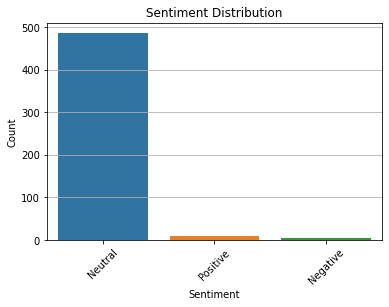

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Sentiment', data=pro_choice_df2)

# set the title and axes labels
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

In [ ]:
pro_life_df3 = pd.DataFrame({'Pro life comments':comments2,"Sentiment":pro_life_categories})
pro_life_df3.head()

,Pro life comments,Sentiment
0,"They say ""pro lifers"" like its an insult, i ta...",neu
1,"We’re fine with it. As a matter of fact, it’s ...",neu
2,"""Nobody goes around actively seeking abortions...",neu
3,Let me also plug r/Reformed.,neu
4,https://www.washingtonpost.com/politics/2022/0...,neu


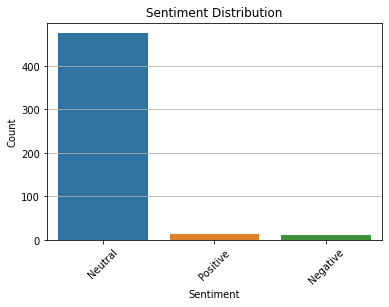

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_life_df3)

# set the title and axes labels
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

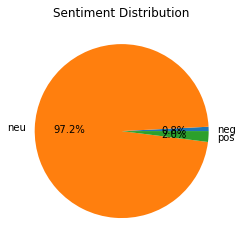

In [ ]:

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_choice_df2.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%')

# set the title
ax.set_title('Sentiment Distribution')

# show the plot
plt.show()

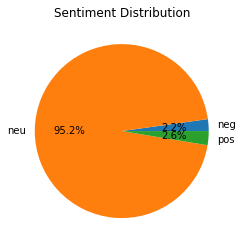

In [ ]:

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_life_df3.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%')

# set the title
ax.set_title('Sentiment Distribution')

# show the plot
plt.show()


In [ ]:
pro_choice_categories3 = []
for i in prochoice_comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  del sentiment_dict['neu']
  pro_choice_categories3.append(get_cat(sentiment_dict))

In [ ]:
pro_life_categories4 = []
for i in prolife_comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  del sentiment_dict['neu']
  pro_life_categories4.append(get_cat(sentiment_dict))

In [ ]:
print("For pro choice")
print(Counter(pro_choice_categories3))
print("For pro life")
print(Counter(pro_life_categories4))

For pro choice
Counter({'neg': 298, 'pos': 202})
For pro life
Counter({'neg': 296, 'pos': 204})


In [ ]:
pro_choice_df5 = pd.DataFrame({'Pro choice comments':comments,"Sentiment":pro_choice_categories3})
pro_choice_df5.head()

,Pro choice comments,Sentiment
0,I don't think abortion is gonna get banned any...,pos
1,Baby boy? Sure. At birth. \n\n\nYou want to fo...,pos
2,Doesn’t that completely undo the point of supp...,neg
3,"There shouldn't be a ""default solution"" to beg...",neg
4,Anti-choicers always argue that pregnancies be...,neg


In [ ]:
pro_life_df6 = pd.DataFrame({'Pro life comments':comments2,"Sentiment":pro_life_categories4})
pro_life_df6.head()

,Pro life comments,Sentiment
0,"They say ""pro lifers"" like its an insult, i ta...",neg
1,"We’re fine with it. As a matter of fact, it’s ...",pos
2,"""Nobody goes around actively seeking abortions...",neg
3,Let me also plug r/Reformed.,neg
4,https://www.washingtonpost.com/politics/2022/0...,neg


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pro_choice_df5['Sentiment'].value_counts()

neg    298
pos    202
Name: Sentiment, dtype: int64

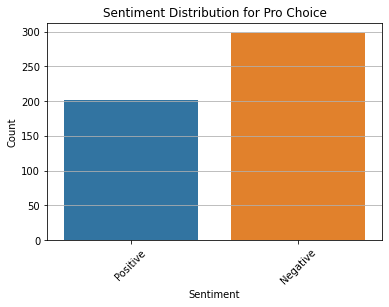

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_choice_df5)

# set the title and axes labels
ax.set_title('Sentiment Distribution for Pro Choice')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

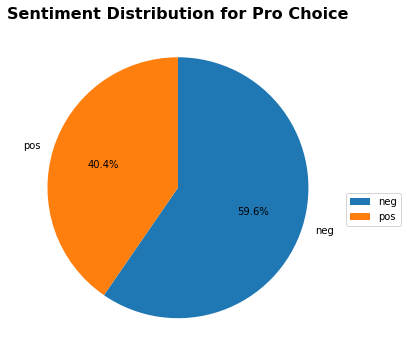

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_choice_df5.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, counterclock=False)

# set the title and add a shadow
ax.set_title('Sentiment Distribution for Pro Choice', fontsize=16, fontweight='bold')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(sentiment_counts['Sentiment'], loc='best', bbox_to_anchor=(1, 0.5))
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.8)
ax.axis('off')

# show the plot
plt.show()


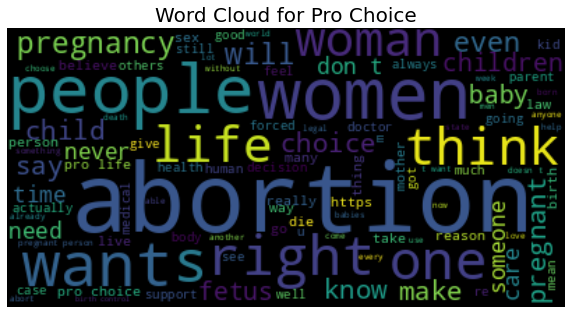

abortion: 1.0
women: 0.4909090909090909
people: 0.48484848484848486
want: 0.4121212121212121
s: 0.36363636363636365
right: 0.3333333333333333
one: 0.3242424242424242
think: 0.2878787878787879
life: 0.27575757575757576
woman: 0.2727272727272727


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all comments into a single string
comments = ' '.join(pro_choice_df5['Pro choice comments'].tolist())

# create a word cloud object with some customization
wordcloud = WordCloud(background_color='black', max_words=100, colormap='viridis').generate(comments)

# plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Pro Choice', fontsize=20)
plt.axis('off')
plt.show()

# get the top ten repeated words from the word cloud
word_freq = Counter(wordcloud.words_)
top_words = word_freq.most_common(10)

# print the top ten repeated words and their frequency
for word, freq in top_words:
    print(f'{word}: {freq}')

In [ ]:
pro_life_df6['Sentiment'].value_counts()

neg    296
pos    204
Name: Sentiment, dtype: int64

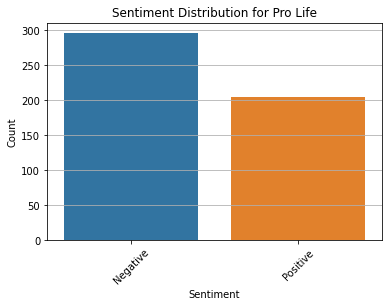

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_life_df6)

# set the title and axes labels
ax.set_title('Sentiment Distribution for Pro Life')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Negative', 'Positive'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

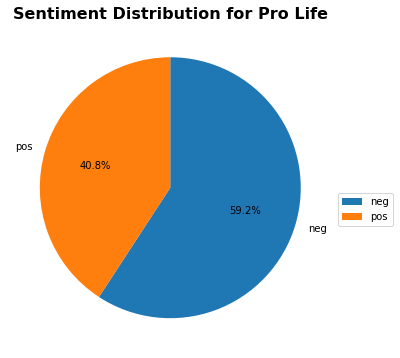

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_life_df6.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, counterclock=False)

# set the title and add a shadow
ax.set_title('Sentiment Distribution for Pro Life', fontsize=16, fontweight='bold')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(sentiment_counts['Sentiment'], loc='best', bbox_to_anchor=(1, 0.5))
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.8)
ax.axis('off')

# show the plot
plt.show()


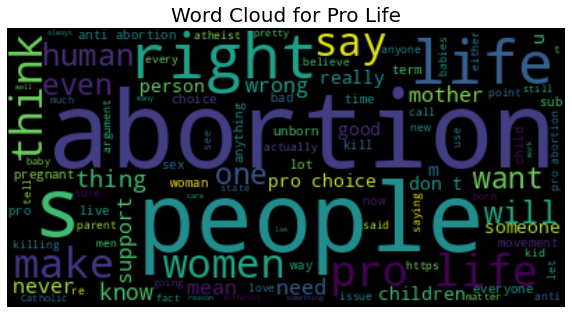

abortion: 1.0
people: 0.8187919463087249
s: 0.5503355704697986
right: 0.5302013422818792
life: 0.4899328859060403
pro life: 0.47651006711409394
think: 0.46308724832214765
make: 0.4228187919463087
women: 0.38926174496644295
say: 0.37583892617449666


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all comments into a single string
comments = ' '.join(pro_life_df6['Pro life comments'].tolist())

# create a word cloud object with some customization
wordcloud = WordCloud(background_color='black', max_words=100, colormap='viridis').generate(comments)

# plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Pro Life', fontsize=20)
plt.axis('off')
plt.show()

# get the top ten repeated words from the word cloud
word_freq = Counter(wordcloud.words_)
top_words = word_freq.most_common(10)

# print the top ten repeated words and their frequency
for word, freq in top_words:
    print(f'{word}: {freq}')

## Topic Modeling

### LDA

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('wordnet')
import gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem = WordNetLemmatizer()

#### Pro choice Positive Comments

In [ ]:
choice_pos_df = pro_choice_df5[pro_choice_df5['Sentiment']=='pos']
choice_pos_df.reset_index(inplace=True)

In [ ]:
clean_data_cp = []
for i in tqdm(range(len(choice_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_pos_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data_cp.append(sent)

100%|██████████| 202/202 [00:01<00:00, 151.87it/s]


In [ ]:
dictionary_cp  = gensim.corpora.Dictionary(clean_data_cp)

In [ ]:
bow_corpus_cp = [dictionary_cp.doc2bow(doc) for doc in clean_data_cp]

In [ ]:
lda_model_cp =  gensim.models.LdaMulticore(bow_corpus_cp, 
                                   num_topics = 3, 
                                   id2word = dictionary_cp,                                    
                                   passes = 10,
                                   workers = 2)

In [ ]:
for idx, topic in lda_model_cp.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.025*"abortion" + 0.019*"woman" + 0.011*"want" + 0.008*"child" + 0.007*"people" + 0.007*"one" + 0.006*"shall" + 0.006*"pregnant" + 0.006*"life" + 0.005*"also"


Topic: 1 
Words: 0.017*"abortion" + 0.016*"woman" + 0.012*"choice" + 0.012*"life" + 0.010*"want" + 0.010*"would" + 0.009*"people" + 0.009*"like" + 0.008*"pro" + 0.007*"get"


Topic: 2 
Words: 0.024*"abortion" + 0.012*"pro" + 0.010*"woman" + 0.009*"life" + 0.007*"right" + 0.006*"would" + 0.006*"people" + 0.006*"forced" + 0.005*"one" + 0.005*"choice"




#### Pro choice negative comments

In [ ]:
choice_neg_df = pro_choice_df5[pro_choice_df5['Sentiment']=='neg']
choice_neg_df.reset_index(inplace=True)

In [ ]:
clean_data_cn = []
for i in tqdm(range(len(choice_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_neg_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data_cn.append(sent)

100%|██████████| 298/298 [00:01<00:00, 164.44it/s]


In [ ]:
dictionary_cn  = gensim.corpora.Dictionary(clean_data_cn)
bow_corpus_cn = [dictionary_cn.doc2bow(doc) for doc in clean_data_cn]
lda_model_cn =  gensim.models.LdaMulticore(bow_corpus_cn, 
                                   num_topics = 3, 
                                   id2word = dictionary_cn,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model_cn.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"abortion" + 0.010*"pregnant" + 0.008*"people" + 0.008*"pregnancy" + 0.008*"get" + 0.008*"life" + 0.008*"person" + 0.006*"child" + 0.006*"birth" + 0.005*"pro"


Topic: 1 
Words: 0.014*"abortion" + 0.012*"woman" + 0.012*"people" + 0.011*"life" + 0.010*"pro" + 0.009*"choice" + 0.008*"right" + 0.007*"want" + 0.006*"like" + 0.006*"fetus"


Topic: 2 
Words: 0.024*"abortion" + 0.015*"woman" + 0.012*"child" + 0.011*"would" + 0.010*"want" + 0.008*"people" + 0.007*"think" + 0.007*"get" + 0.007*"like" + 0.007*"one"




#### Pro Life positive comments

In [ ]:
life_pos_df = pro_life_df6[pro_life_df6['Sentiment']=='pos']
life_pos_df.reset_index(inplace=True)

In [ ]:
clean_data_lp = []
for i in tqdm(range(len(life_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_pos_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data_lp.append(sent)

100%|██████████| 204/204 [00:00<00:00, 239.77it/s]


In [ ]:
dictionary_lp  = gensim.corpora.Dictionary(clean_data_lp)
bow_corpus_lp = [dictionary_lp.doc2bow(doc) for doc in clean_data_lp]
lda_model_lp =  gensim.models.LdaMulticore(bow_corpus_lp, 
                                   num_topics = 3, 
                                   id2word = dictionary_lp,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model_lp.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.019*"people" + 0.016*"life" + 0.011*"abortion" + 0.011*"pro" + 0.010*"woman" + 0.009*"like" + 0.007*"make" + 0.007*"know" + 0.006*"would" + 0.006*"human"


Topic: 1 
Words: 0.014*"abortion" + 0.006*"like" + 0.006*"pro" + 0.006*"also" + 0.006*"people" + 0.005*"life" + 0.004*"mother" + 0.004*"get" + 0.004*"think" + 0.004*"bill"


Topic: 2 
Words: 0.018*"pro" + 0.015*"abortion" + 0.014*"life" + 0.007*"think" + 0.006*"right" + 0.006*"like" + 0.006*"people" + 0.006*"get" + 0.006*"choice" + 0.005*"u"




#### Pro life negative comments

In [ ]:
life_neg_df = pro_life_df6[pro_life_df6['Sentiment']=='neg']
life_neg_df.reset_index(inplace=True)

In [ ]:
clean_data_ln = []
for i in tqdm(range(len(life_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_neg_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data_ln.append(sent)

100%|██████████| 296/296 [00:01<00:00, 254.89it/s]


In [ ]:
dictionary_ln  = gensim.corpora.Dictionary(clean_data_ln)
bow_corpus_ln = [dictionary_ln.doc2bow(doc) for doc in clean_data_ln]
lda_model_ln =  gensim.models.LdaMulticore(bow_corpus_ln, 
                                   num_topics = 3, 
                                   id2word = dictionary_ln,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model_ln.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.015*"pro" + 0.014*"abortion" + 0.011*"people" + 0.010*"woman" + 0.008*"say" + 0.007*"child" + 0.007*"choice" + 0.006*"even" + 0.006*"life" + 0.006*"would"


Topic: 1 
Words: 0.021*"abortion" + 0.018*"life" + 0.017*"pro" + 0.013*"right" + 0.009*"anti" + 0.009*"human" + 0.008*"would" + 0.008*"term" + 0.008*"like" + 0.007*"one"


Topic: 2 
Words: 0.015*"abortion" + 0.010*"life" + 0.010*"people" + 0.009*"pro" + 0.008*"sex" + 0.007*"even" + 0.007*"would" + 0.006*"human" + 0.006*"support" + 0.005*"think"




### BERTopic

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 66.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [ ]:
from bertopic import BERTopic
from umap import UMAP

#### Pro choice positive comments

In [ ]:
clean_data_bcp = []
for i in tqdm(range(len(choice_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_pos_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data_bcp.append(sent)

100%|██████████| 202/202 [00:01<00:00, 152.33it/s]


In [ ]:
umap_model_bcp = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model_bcp = BERTopic(umap_model=umap_model_bcp, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_bcp.fit_transform(clean_data_bcp)

In [ ]:
topic_model_bcp.visualize_documents(clean_data_bcp)

#### Pro choice negative comments

In [ ]:
clean_data_bcn = []
for i in tqdm(range(len(choice_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_neg_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data_bcn.append(sent)

umap_model_bcn = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model_bcn = BERTopic(umap_model=umap_model_bcn, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_bcn.fit_transform(clean_data_bcn)

topic_model_bcn.visualize_documents(clean_data_bcn)

100%|██████████| 298/298 [00:02<00:00, 133.12it/s]


#### Pro life positive comments

In [ ]:
clean_data_blp = []
for i in tqdm(range(len(life_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_pos_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data_blp.append(sent)

umap_model_blp = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model_blp = BERTopic(umap_model=umap_model_blp, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_blp.fit_transform(clean_data_blp)

topic_model_blp.visualize_documents(clean_data_blp)

100%|██████████| 204/204 [00:00<00:00, 241.22it/s]


#### Pro life negative comments

In [ ]:
clean_data_bln = []
for i in tqdm(range(len(life_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_neg_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data_bln.append(sent)

umap_model_bln = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model_bln = BERTopic(umap_model=umap_model_bln, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_bln.fit_transform(clean_data_bln)

topic_model_bln.visualize_documents(clean_data_bln)

100%|██████████| 296/296 [00:01<00:00, 244.19it/s]


###Test

In [6]:
import praw
from tqdm import tqdm

reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro choice', 'prochoice', 'pro abortion','pro-abortion']


comment_data = []

# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prochoice').search(f'{keywords}', f'during:{start_date}..{end_date}', limit=400)):
    post_url = submission.url
    post_author = submission.author.name
    post_upvotes = submission.score
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        # Append the comment data to the comment_data list if its score is greater than 10
        if comment.score > 10:
            comment_data.append({'Comment': comment.body,
                                 'Date': pd.to_datetime(comment.created_utc, unit='s'),
                                 'Post URL': post_url,
                                 'Post Author': post_author,
                                 'Post Upvotes': post_upvotes,
                                 'Comment Author': comment.author.name if comment.author else '[deleted]',
                                 'Comment Upvotes': comment.score})

# Create a DataFrame from the comment_data list
df = pd.DataFrame(comment_data, columns=['Comment', 'Date', 'Post URL', 'Post Author', 'Post Upvotes', 'Comment Author', 'Comment Upvotes'])


227it [01:25,  2.67it/s]


In [7]:
len(comment_data)

808

In [8]:
prochoice_comments = sample(comment_data,500)

In [ ]:
print(df)

                                               Comment                Date  \
0    "Its my child too im the father" ok but its no... 2023-02-27 16:41:25   
1    "I'm prochoice unless a hypothetical woman I'm... 2023-02-27 17:08:26   
2    To op: You're unlikely to be well received. Ha... 2023-02-27 16:14:25   
3    Well as the mods warned your position is not w... 2023-02-27 17:00:10   
4    You don’t get to say who can or can’t have an ... 2023-02-27 17:05:23   
..                                                 ...                 ...   
109  I’m pro death with dignity (DwD!) but it’s tri... 2021-11-27 04:42:44   
110  Most countries are making it easier for women ... 2021-12-18 01:34:14   
111  Nicaragua, China, Poland  and America the only... 2021-12-18 01:37:17   
112  It really shows how much of a dump Republicans... 2021-12-18 01:39:32   
113  They want the Evangelical version of Poland, i... 2021-12-18 01:50:12   

                                              Post URL        P

In [10]:
df.to_csv("SMM_P2_Prochoice.csv", index=True)

In [11]:
import praw
from tqdm import tqdm

reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro life', 'prolife', 'anti abortion','anti-abortion']


comment_data_prolife = []

# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prolife').search(f'{keywords}', f'during:{start_date}..{end_date}', limit=400)):
    post_url = submission.url
    post_author = submission.author.name
    post_upvotes = submission.score
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        # Append the comment data to the comment_data list if its score is greater than 10
        if comment.score > 10:
            comment_data_prolife.append({'Comment': comment.body,
                                 'Date': pd.to_datetime(comment.created_utc, unit='s'),
                                 'Post URL': post_url,
                                 'Post Author': post_author,
                                 'Post Upvotes': post_upvotes,
                                 'Comment Author': comment.author.name if comment.author else '[deleted]',
                                 'Comment Upvotes': comment.score})

# Create a DataFrame from the comment_data list
df = pd.DataFrame(comment_data_prolife, columns=['Comment', 'Date', 'Post URL', 'Post Author', 'Post Upvotes', 'Comment Author', 'Comment Upvotes'])


218it [07:25,  2.04s/it]


In [13]:
len(comment_data_prolife)

674

In [14]:
df.to_csv("SMM_P2_Prolife.csv", index=True)